In [129]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

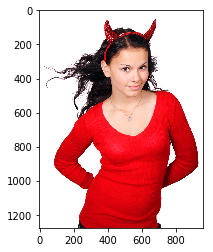

In [130]:
image = cv2.imread("image.jpg")
image_copy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

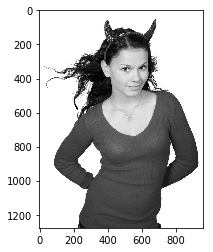

In [131]:
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

Text(0.5, 1.0, 'edge detection image')

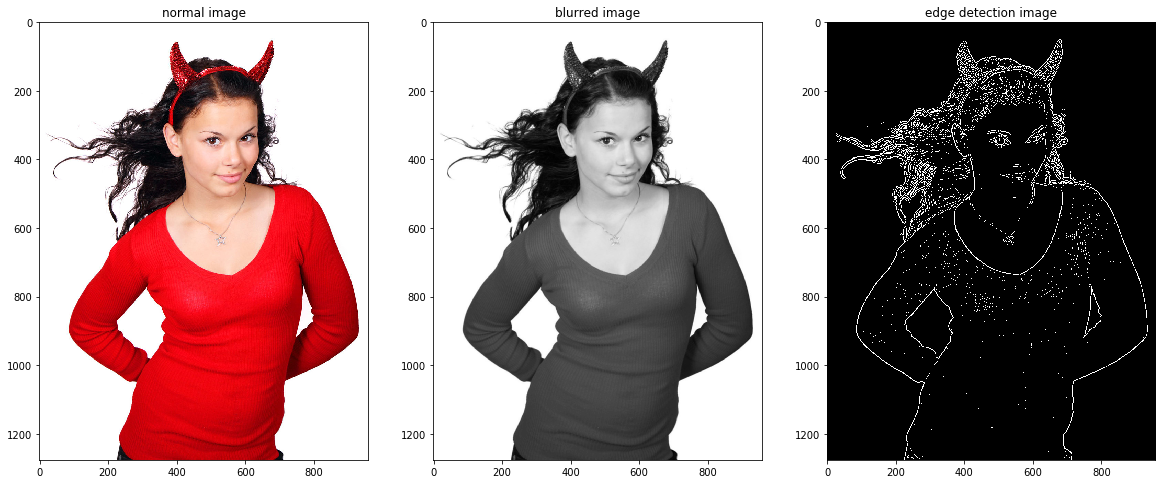

In [76]:
averaging_kernel = np.array([[1,1,1], 
                             [1,1,1], 
                             [1,1,1]])/9

edge_detection_kernel = np.array([[0, -1, 0],
                                  [-1, 4,-1],
                                  [ 0,-1, 0]])

blurred_image = cv2.filter2D(gray, -1, averaging_kernel)
filtered_edge_image = cv2.filter2D(blurred_image, -1, edge_detection_kernel)

T1, filtered_edge_image = cv2.threshold(filtered_edge_image, 5, 255, cv2.THRESH_BINARY)

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,10))

ax1.imshow(gray)
ax1.set_title("normal gray scale image")

ax2.imshow(blurred_image, cmap='gray')
ax2.set_title("blurred image")

ax3.imshow(filtered_edge_image, cmap='gray')
ax3.set_title("edge detection image")

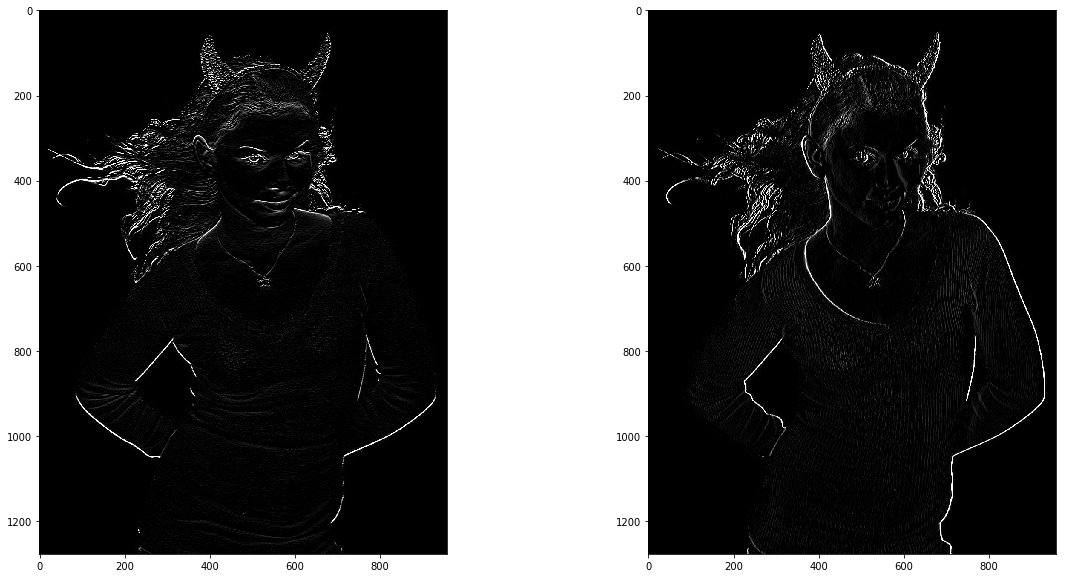

In [77]:
# custom kernel

sobel_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])

sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])


filtered_image_y = cv2.filter2D(gray, -1, sobel_y)
filtered_image_x = cv2.filter2D(gray, -1, sobel_x)

f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(filtered_image_y, cmap='gray')
ax2.imshow(filtered_image_x, cmap='gray')

In [82]:
def give_edge_image(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    averaging_kernel = np.array([[1,1,1], 
                             [1,1,1], 
                             [1,1,1]])/9
    
    edge_detection_kernel = np.array([[0, -1, 0],
                                  [-1, 4,-1],
                                  [ 0,-1, 0]])
    
    blurred_image = cv2.filter2D(gray, -1, averaging_kernel)
    filtered_edge_image = cv2.filter2D(blurred_image, -1, edge_detection_kernel)
    
    t1, filtered_edge_image = cv2.threshold(filtered_edge_image, 5, 255, cv2.THRESH_BINARY)
    
    return filtered_edge_image

In [128]:
pathIn = "video.mp4"
pathOut = "data/"

os.mkdir(pathOut)
 
cap = cv2.VideoCapture(pathIn)
count = 0

while (cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if (frame is None):
        break
    
    edge_image = give_edge_image(frame)

    (h, w) = edge_image.shape[:2]
    center = (h/2 + 80, w/2 - 300)
    M = cv2.getRotationMatrix2D(center, -90, 1.0)
    edge_image = cv2.warpAffine(edge_image, M, (h,w))
    
    if ret == True:
        print('Read %d frame: ' % count, ret)
        cv2.imwrite(os.path.join(pathOut, "frame{:d}.jpg".format(count)), edge_image)  # save frame as JPEG file
        count += 1
    else:
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

720 1280
Read 0 frame:  True
720 1280
Read 1 frame:  True
720 1280
Read 2 frame:  True
720 1280
Read 3 frame:  True
720 1280
Read 4 frame:  True
720 1280
Read 5 frame:  True
720 1280
Read 6 frame:  True
720 1280
Read 7 frame:  True
720 1280
Read 8 frame:  True
720 1280
Read 9 frame:  True
720 1280
Read 10 frame:  True
720 1280
Read 11 frame:  True
720 1280
Read 12 frame:  True
720 1280
Read 13 frame:  True
720 1280
Read 14 frame:  True
720 1280
Read 15 frame:  True
720 1280
Read 16 frame:  True
720 1280
Read 17 frame:  True
720 1280
Read 18 frame:  True
720 1280
Read 19 frame:  True
720 1280
Read 20 frame:  True
720 1280
Read 21 frame:  True
720 1280
Read 22 frame:  True
720 1280
Read 23 frame:  True
720 1280
Read 24 frame:  True
720 1280
Read 25 frame:  True
720 1280
Read 26 frame:  True
720 1280
Read 27 frame:  True
720 1280
Read 28 frame:  True
720 1280
Read 29 frame:  True
720 1280
Read 30 frame:  True
720 1280
Read 31 frame:  True
720 1280
Read 32 frame:  True
720 1280
Read 33 fra

In [123]:
img_array = []
for filename in os.listdir('data'):
    print (filename)
    img = cv2.imread('data/'+filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

frame0.jpg
frame1.jpg
frame10.jpg
frame11.jpg
frame12.jpg
frame13.jpg
frame14.jpg
frame15.jpg
frame16.jpg
frame17.jpg
frame18.jpg
frame19.jpg
frame2.jpg
frame20.jpg
frame21.jpg
frame22.jpg
frame23.jpg
frame24.jpg
frame25.jpg
frame26.jpg
frame27.jpg
frame28.jpg
frame29.jpg
frame3.jpg
frame30.jpg
frame31.jpg
frame32.jpg
frame33.jpg
frame34.jpg
frame35.jpg
frame36.jpg
frame37.jpg
frame38.jpg
frame39.jpg
frame4.jpg
frame40.jpg
frame41.jpg
frame42.jpg
frame43.jpg
frame44.jpg
frame45.jpg
frame5.jpg
frame6.jpg
frame7.jpg
frame8.jpg
frame9.jpg
